In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime, date
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
trans = pd.read_csv(r"D:\Sem 3\PRJ-1\Transaction cleaned.csv")
trans

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,1055.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19440,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,802.26
19441,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,104.24
19442,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,1592.19
19443,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,91.15


In [3]:
print("Total records (rows) in the Transaction Dataset : {}".format(trans.shape[0]))
print("Total features (columns) in the Transaction Dataset : {}".format(trans.shape[1]))

Total records (rows) in the Transaction Dataset : 19445
Total features (columns) in the Transaction Dataset : 14


In [4]:
cust = pd.read_csv(r"D:\Sem 3\PRJ-1\CustomerDemographic_Cleaned.csv")
cust

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,720,Darrel Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,No,6.0,92
1,1092,Katlin Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,No,5.0,88
2,3410,Merrili Brittin,Female,93,1940-09-22,Missing,Property,Mass Customer,N,No,16.0,83
3,658,Donn Bonnell,Male,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,N,Yes,8.0,79
4,2413,Abbey Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,Yes,17.0,80
...,...,...,...,...,...,...,...,...,...,...,...,...
3907,2858,Benedicto Radki,Male,4,2002-01-09,Recruiting Manager,Missing,Mass Customer,N,Yes,1.0,21
3908,3173,Angelo,Male,55,2001-10-10,Computer Systems Analyst I,Health,Mass Customer,N,Yes,1.0,22
3909,3435,Stevena Allcock,Female,80,2002-01-15,Senior Editor,Missing,Affluent Customer,N,No,1.0,21
3910,3949,Costa Sleightholm,Male,24,2001-12-19,Web Designer IV,Manufacturing,High Net Worth,N,Yes,1.0,21


In [5]:
print("Total records (rows) in the Customer Demographics Dataset : {}".format(cust.shape[0]))
print("Total features (columns) in the Customer Demographics Dataset : {}".format(cust.shape[1]))

Total records (rows) in the Customer Demographics Dataset : 3912
Total features (columns) in the Customer Demographics Dataset : 12


In [6]:
merged_trans_cust = pd.merge(trans, cust, left_on='customer_id', right_on='customer_id', how='inner')
merged_trans_cust

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,68
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,68
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,68
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,44
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18999,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,...,Female,12,1955-03-29,Missing,Financial Services,Mass Customer,N,Yes,20.0,68
19000,18735,45,3168,2017-02-21,1.0,Approved,Solex,Standard,medium,medium,...,Male,89,1976-02-16,Assistant Manager,Health,Affluent Customer,N,No,22.0,47
19001,18789,83,3168,2017-04-11,0.0,Approved,Solex,Touring,medium,large,...,Male,89,1976-02-16,Assistant Manager,Health,Affluent Customer,N,No,22.0,47
19002,19113,3,3168,2017-06-03,0.0,Approved,Trek Bicycles,Standard,medium,large,...,Male,89,1976-02-16,Assistant Manager,Health,Affluent Customer,N,No,22.0,47


In [7]:
print("Total records (rows) in the Merged Dataset : {}".format(merged_trans_cust.shape[0]))
print("Total features (columns) in the Merged Dataset : {}".format(merged_trans_cust.shape[1]))

Total records (rows) in the Merged Dataset : 19004
Total features (columns) in the Merged Dataset : 25


In [8]:
merged_trans_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19004 entries, 0 to 19003
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       19004 non-null  int64  
 1   product_id                           19004 non-null  int64  
 2   customer_id                          19004 non-null  int64  
 3   transaction_date                     19004 non-null  object 
 4   online_order                         19004 non-null  float64
 5   order_status                         19004 non-null  object 
 6   brand                                19004 non-null  object 
 7   product_line                         19004 non-null  object 
 8   product_class                        19004 non-null  object 
 9   product_size                         19004 non-null  object 
 10  list_price                           19004 non-null  float64
 11  standard_cost               

The data-type of transaction_date column is not in date-time format. Hence the data-type of the column should be changed from object to datetime type. We can do this using the pandas library.

In [9]:
merged_trans_cust['transaction_date']= pd.to_datetime(merged_trans_cust['transaction_date'])

# 1. RFM Analysis

<b>RFM</b> stands for <b>Recency, Frequency, and Monetary value</b>, each corresponding to some key customer trait. These <b>RFM</b> metrics are important indicators of a customer’s behavior because frequency and monetary value affects a customer’s lifetime value, and recency affects retention, a measure of engagement.
<br>
RFM factors illustrate these facts:
<br><ul>
<li>the more recent the purchase, the more responsive the customer is to promotions,</li><br>
<li>the more frequently the customer buys, the more engaged and satisfied they are,</li><br>
<li>monetary value differentiates heavy spenders from low-value purchasers.</li></ul>

In [10]:
max_trans_date = max(merged_trans_cust['transaction_date']).date()
max_trans_date

datetime.date(2017, 12, 30)

In [11]:
comparison_date = datetime.strptime(str(max_trans_date), "%Y-%m-%d")

In [12]:
rfm_table = merged_trans_cust.groupby(['customer_id']).agg({'transaction_date': lambda date : (comparison_date - date.max()).days,
                                                            'product_id' : lambda prod_id : len(prod_id), 
                                                            'Profit' : lambda p : sum(p)})

In [13]:
rfm_table.columns

Index(['transaction_date', 'product_id', 'Profit'], dtype='object')

In [14]:
rfm_table.rename(columns={'transaction_date' : 'recency', 
                        'product_id' : 'frequency',
                        'Profit' : 'monetary'} , inplace=True)

In [15]:
rfm_table['r_quartile'] = pd.qcut(rfm_table['recency'], 4, ['4','3','2','1'])
rfm_table['f_quartile'] = pd.qcut(rfm_table['frequency'], 4, ['1','2','3','4'])
rfm_table['m_quartile'] = pd.qcut(rfm_table['monetary'], 4, ['1','2','3','4'])
rfm_table

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
customer_id,,,,,,
1,7,11,3018.09,4,4,3
2,128,3,2226.26,1,1,2
3,102,7,3290.21,1,3,3
4,195,2,220.57,1,1,1
5,16,6,2394.94,4,3,2
...,...,...,...,...,...,...
3496,256,4,2045.84,1,1,2
3497,52,3,1648.32,2,1,1
3498,127,6,3147.33,1,3,3


In [16]:
#Calculation of RFM Score
rfm_table['rfm_score'] = 100*rfm_table['r_quartile'].astype(int)+10*rfm_table['f_quartile'].astype(int)+rfm_table['m_quartile'].astype(int)

In [17]:
rfm_table['customer_title'] = pd.qcut(rfm_table['rfm_score'], 4, ['Bronze','Silver','Gold','Platinum'])
rfm_table

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title
customer_id,,,,,,,,
1,7,11,3018.09,4,4,3,443,Platinum
2,128,3,2226.26,1,1,2,112,Bronze
3,102,7,3290.21,1,3,3,133,Bronze
4,195,2,220.57,1,1,1,111,Bronze
5,16,6,2394.94,4,3,2,432,Platinum
...,...,...,...,...,...,...,...,...
3496,256,4,2045.84,1,1,2,112,Bronze
3497,52,3,1648.32,2,1,1,211,Silver
3498,127,6,3147.33,1,3,3,133,Bronze


## Merging both RFM Table with Transaction and Customer Tables

The RFM Table dataframe is merged with the Transactions and Customer Demographics datasets, to gain deeper insights of Customer Segments along with transactions. The dataframes are joined based on customer Ids from both the datasets.

In [18]:
cust_trans_rfm = pd.merge(merged_trans_cust, rfm_table, left_on='customer_id', right_on='customer_id', how='inner')

In [19]:
cust_trans_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19004 entries, 0 to 19003
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19004 non-null  int64         
 1   product_id                           19004 non-null  int64         
 2   customer_id                          19004 non-null  int64         
 3   transaction_date                     19004 non-null  datetime64[ns]
 4   online_order                         19004 non-null  float64       
 5   order_status                         19004 non-null  object        
 6   brand                                19004 non-null  object        
 7   product_line                         19004 non-null  object        
 8   product_class                        19004 non-null  object        
 9   product_size                         19004 non-null  object        
 10  list_price

### Defining an Age Group Feature

In [20]:
cust_trans_rfm['Age_Group'] = cust_trans_rfm['Age'].apply(lambda x : (math.floor(x/10)+1)*10)

#### Developing a Customer tag based on RFM Score Achieved
A broader version of the customer title is developed, dividing the total number of customers into 11 groups. The groups are named as Platinum Customers, Very Loyal Customers, Becoming Loyal Customers, Recent Customers, Potential Customers, Late Bloomer, Loosing Customers, High Risk Customers, Almost Lost Customers, Evasive Customers and Lost Customers.

In [21]:
def cust_score_title_lkup(cols):
    
    rfm_score = cols[0]
    
    if rfm_score >= 444:
        return 'Platinum Customer'
    elif rfm_score >=433 and rfm_score < 444:
        return 'Very Loyal Customer'
    elif rfm_score >=421 and rfm_score < 433:
        return 'Becoming Loyal Customer'
    elif rfm_score >=344 and rfm_score < 421:
        return 'Recent Customer'
    elif rfm_score >=323 and rfm_score < 344:
        return 'Potential Customer'
    elif rfm_score >=311 and rfm_score < 323:
        return 'Late Bloomer'
    elif rfm_score >=224 and rfm_score < 311:
        return 'Loosing Customer'
    elif rfm_score >=212 and rfm_score < 224:
        return 'High Risk Customer'
    elif rfm_score >=124 and rfm_score < 212:
        return 'Almost Lost Customer'
    elif rfm_score >=112 and rfm_score < 124:
        return 'Evasive Customer'
    else :
        return 'Lost Customer'

In [22]:
cust_trans_rfm['detail_cust_title']=cust_trans_rfm[['rfm_score']].apply(cust_score_title_lkup, axis=1)

In [23]:
def get_rank(cols):
    
    title = cols[0]
    
    if title=='Platinum Customer':
        return 1
    elif title=='Very Loyal Customer':
        return 2
    elif title == 'Becoming Loyal Customer':
        return 3
    elif title == 'Recent Customer':
        return 4
    elif title=='Potential Customer':
        return 5
    elif title == 'Late Bloomer':
        return 6
    elif title == 'Loosing Customer':
        return 7
    elif title=='High Risk Customer':
        return 8
    elif title == 'Almost Lost Customer':
        return 9
    elif title == 'Evasive Customer':
        return 10
    else :
        return 11

In [24]:
cust_trans_rfm['rank']=cust_trans_rfm[['detail_cust_title']].apply(get_rank, axis=1)

# 2.Exporting to CSV File
After performing data quality assessment(DQA), data cleaning and RFM Analysis on the dataset, it's time to export the dataset to a csv file for further exploratory data analysis (EDA) and this data will drive the Customer Segmenation Dashboard.

In [25]:
cust_trans_rfm.to_csv('Customer_Trans_RFM_Analysis.csv', index=False)

In [26]:
print("Total records in final dataset : {}".format(cust_trans_rfm.shape[0]))

Total records in final dataset : 19004


# 3. Data Analysis and Exploration
### 3.1. Age Distributions of New vs. Old Customers
Most Customers are aged between <b>40-49</b>. The lowest age groups are under <b>20</b> and <b>80+</b> for both Old and New Customers dataset.<br>
Among the New Customers the most populated age bracket is <b>20-29</b> and <b>60-69</b>, while the maximum Old Customers are from the age bracket <b>50-69</b>.<br>
There is a steep drop in number of customers in 30-39 age grouped among the New Customers.

In [27]:
# Loading the New Customers Dataset
new_cust = pd.read_csv(r"D:\Sem 3\PRJ-1\NewCustomerList_Cleaned.csv")

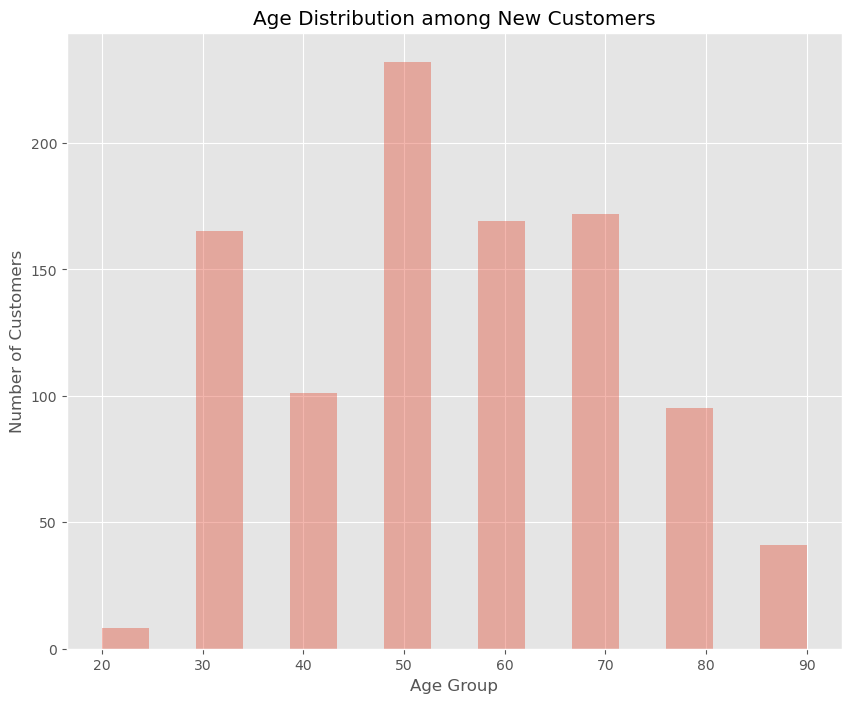

In [28]:
plt.figure(figsize=(10,8))
sns.distplot(new_cust['Age Group'], kde=False, bins=15)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Age Distribution among New Customers')

plt.show()

#### Here 20 defines as age under 20, 30 defines as age bracket between 20-29 

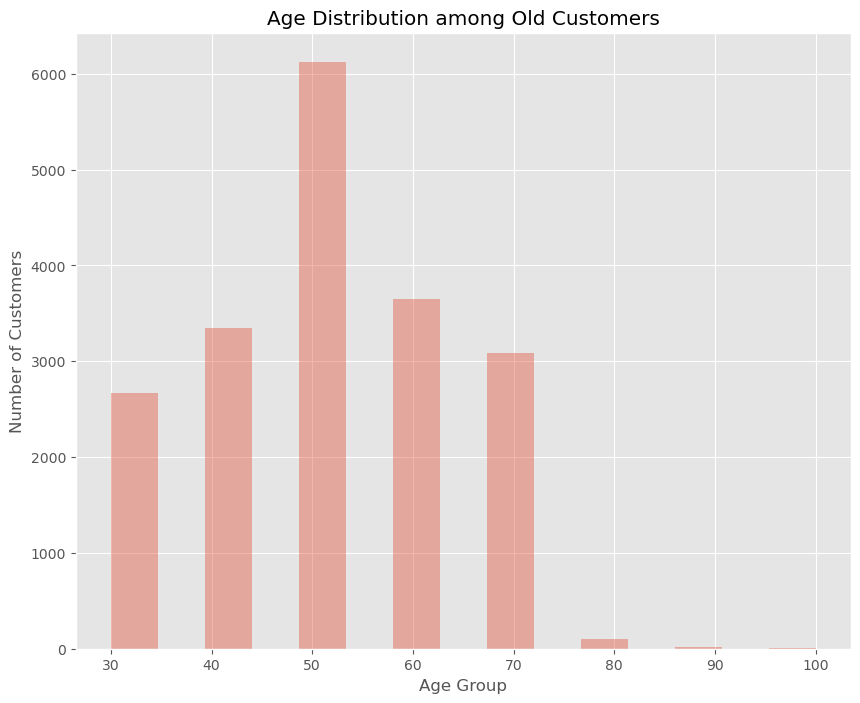

In [29]:
plt.figure(figsize=(10,8))
sns.distplot(cust_trans_rfm['Age_Group'], kde=False, bins=15)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Age Distribution among Old Customers')

plt.show()

#### Here 20 defines as age under 20<br>30 defines as age bracket between 20-29 

### 3.2. Bike related purchases over last 3 years by gender
Over the last 3 years approximately 51% of the buyers are female and 49% were male buyers.<br>
Female purchases are approximately 10,000 more than male (numerically). Gender wise majority of the bike sales comes from female customers.

In [30]:
cust_bike_purchase_by_gender = cust_trans_rfm.groupby('gender').agg({'past_3_years_bike_related_purchases' : sum}
                                                                 ).reset_index()

In [31]:
total_records = cust_trans_rfm['past_3_years_bike_related_purchases'].sum()

In [32]:
cust_bike_purchase_by_gender['Percent_of_total'] = (cust_bike_purchase_by_gender['past_3_years_bike_related_purchases']
                                                        /total_records)*100

In [33]:
cust_bike_purchase_by_gender

,gender,past_3_years_bike_related_purchases,Percent_of_total
0,Female,470544,50.596455
1,Male,459450,49.403545


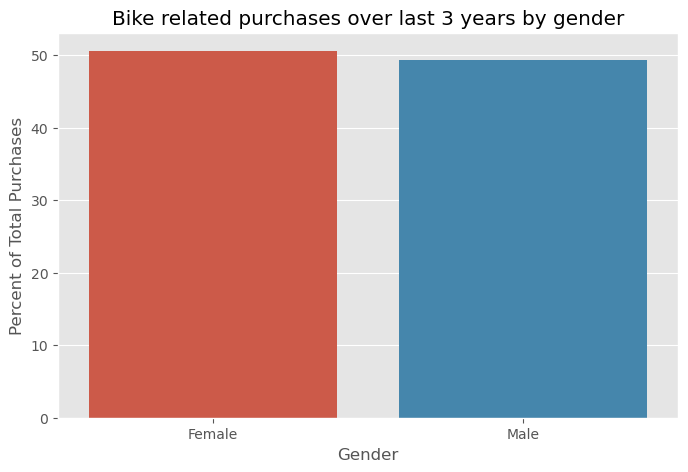

In [34]:
plt.figure(figsize=(8,5))
sns.barplot(x='gender',y='Percent_of_total',data=cust_bike_purchase_by_gender)
plt.xlabel('Gender')
plt.ylabel('Percent of Total Purchases')
plt.title('Bike related purchases over last 3 years by gender')
plt.show()

### 3.3 Job Industry Customer Distribution
Sales from new customers who work in the manufacturing and financial services sectors account for the largest portion of total sales. Customers in the agriculture and telecom sectors account for the smallest share of sales, each with 3% of total sales. A similar pattern is noted with regard to Old Customers.

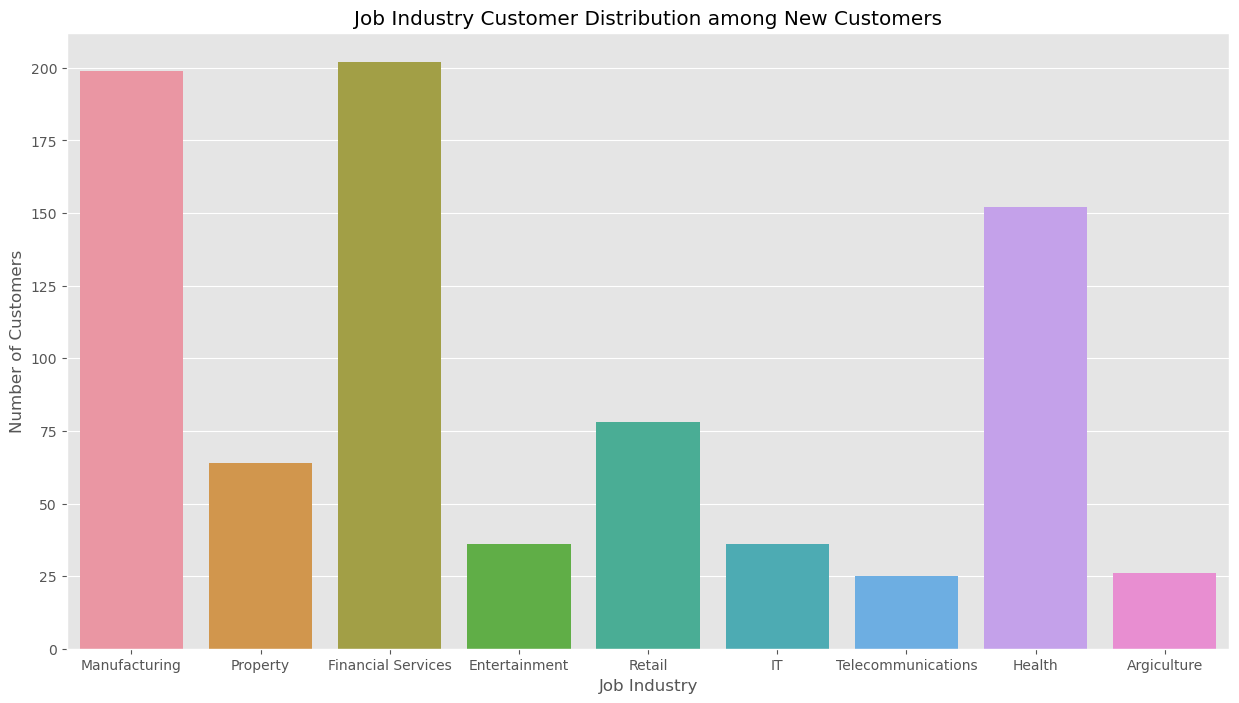

In [35]:
plt.figure(figsize=(15,8))
sns.countplot(x='job_industry_category',data=new_cust[~(new_cust['job_industry_category']=='Missing')])
plt.xlabel('Job Industry')
plt.ylabel('Number of Customers')
plt.title('Job Industry Customer Distribution among New Customers')
plt.show()

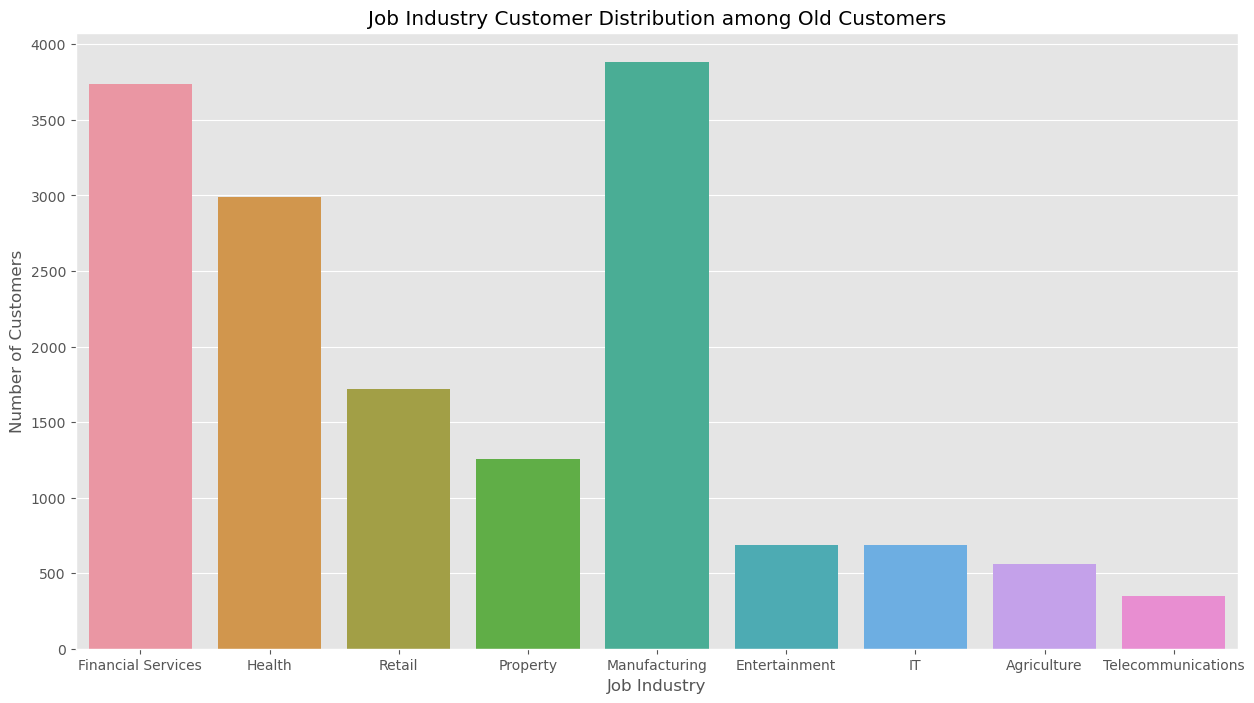

In [36]:
plt.figure(figsize=(15,8))
sns.countplot(x='job_industry_category',data=cust_trans_rfm[~(cust_trans_rfm['job_industry_category']=='Missing')])
plt.xlabel('Job Industry')
plt.ylabel('Number of Customers')
plt.title('Job Industry Customer Distribution among Old Customers')

plt.show()

### 3.4. Wealth Segmentation by Age Group
Across all Age Groups the maximum number of customers are classified as 'Mass Customers'. The next being 'High Net Worth'. However among 40-49 aged customers 'Affluent Customers' outperforms the 'High Net Worth' customers.
#### New Customers

In [37]:
wealth_age_seg_new = new_cust.groupby(['wealth_segment', 'Age Group']).size().reset_index()

In [38]:
wealth_age_seg_new.rename(columns={0:'Number of Customers'}, inplace=True)
wealth_age_seg_new

,wealth_segment,Age Group,Number of Customers
0,Affluent Customer,20,3
1,Affluent Customer,30,49
2,Affluent Customer,40,15
3,Affluent Customer,50,58
4,Affluent Customer,60,40
5,Affluent Customer,70,41
6,Affluent Customer,80,20
7,Affluent Customer,90,9
8,High Net Worth,30,42
9,High Net Worth,40,34


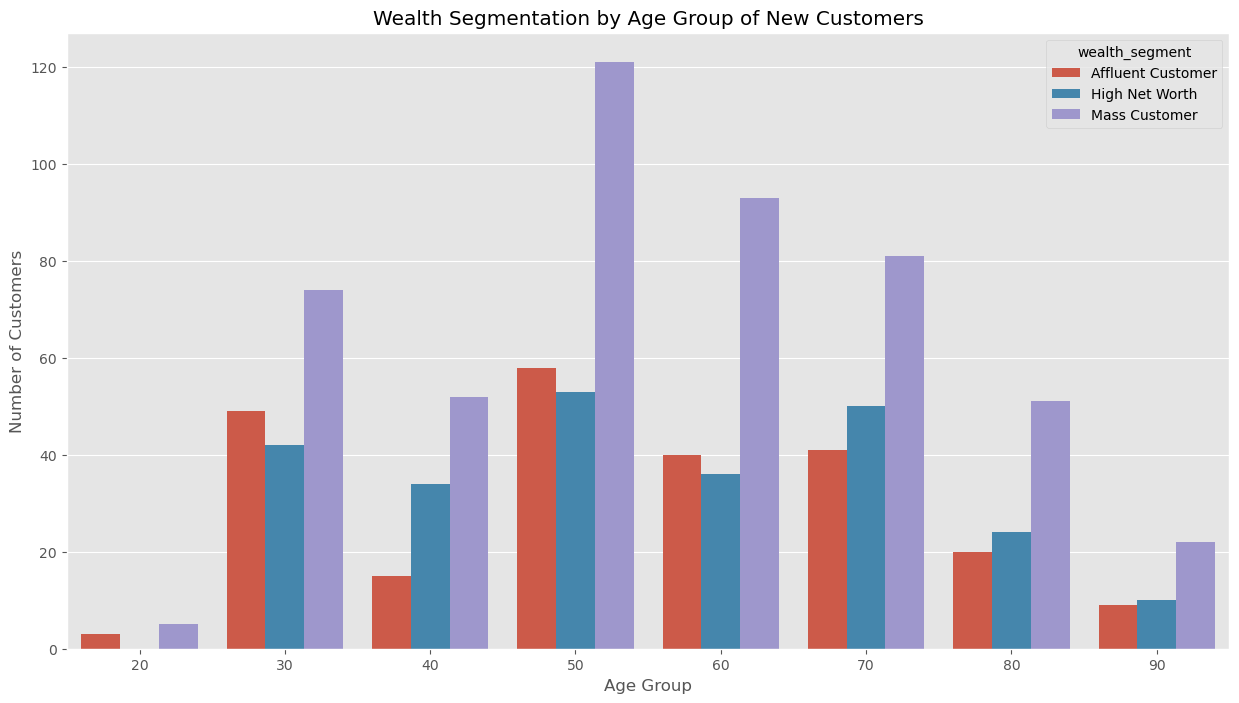

In [39]:
plt.figure(figsize=(15,8))
sns.barplot(x='Age Group', y='Number of Customers' , hue='wealth_segment', data=wealth_age_seg_new)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Wealth Segmentation by Age Group of New Customers')
plt.show()

In all the age groups the most number of customers are 'Mass Customers'. The 2nd largest customer base being the 'High Net Worth' group.
In the age group 40-49 the 'Affluent Customer' group outperforms 'High Net Worth' group

#### Old Customers

Similar treand (like that of New Customers) is observed among Old Customers

In [40]:
wealth_age_seg_old = cust_trans_rfm.groupby(['wealth_segment', 'Age_Group']).size().reset_index()

In [41]:
wealth_age_seg_old.rename(columns={0:'Number of Customers'}, inplace=True)

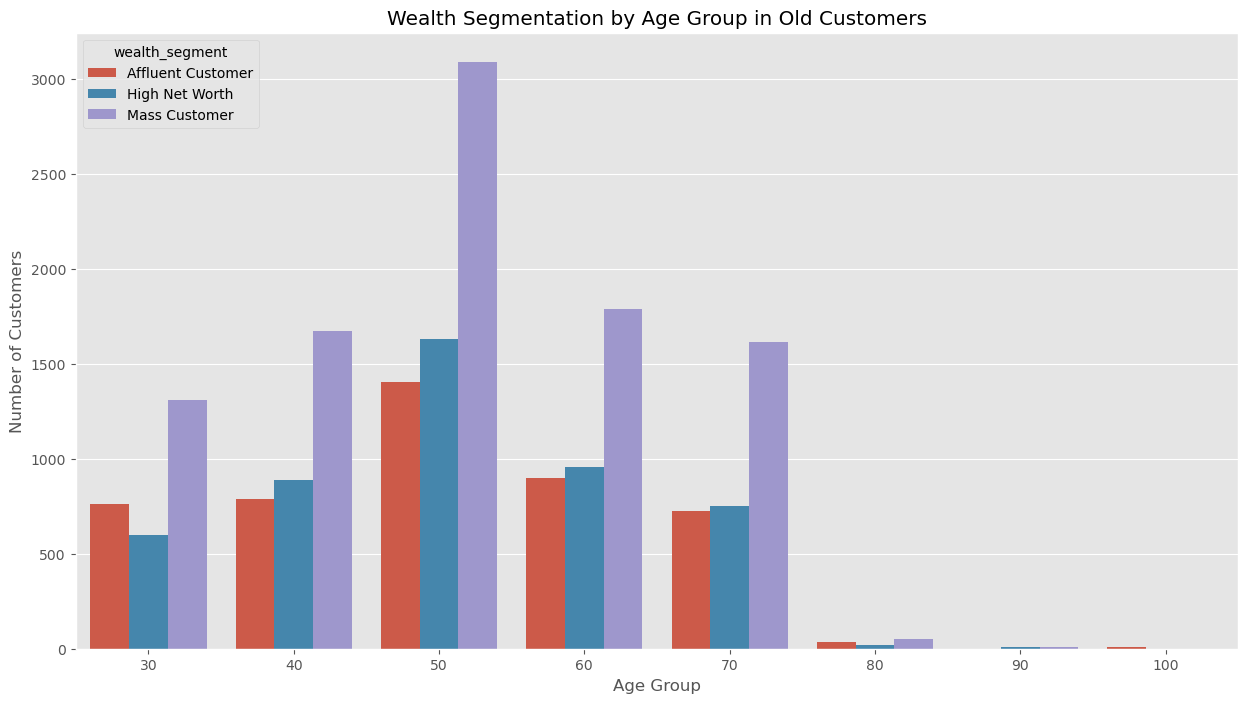

In [42]:
plt.figure(figsize=(15,8))
sns.barplot(x='Age_Group', y='Number of Customers' , hue='wealth_segment', data=wealth_age_seg_old)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Wealth Segmentation by Age Group in Old Customers')
plt.show()

### 3.5. Car owner across each State
The customer base of the automobile bike company lies in New South Wales, Queensland and Victoria, Australia.
In New South Wales (NSW) it seems there is a greater amount of people who donot own a car. In Victoria (VIC) the proportion is evenly split. However in Queensland (QLD) there are relatively more people who own the car.

In [43]:
cust_addr_info = pd.read_csv(r"D:\Sem 3\PRJ-1\CustomerAddress_Cleaned.csv")

In [44]:
cust_trans_addr = pd.merge(cust_trans_rfm , cust_addr_info, left_on = 'customer_id' , 
                           right_on = 'customer_id', how='inner')

In [45]:
print("RFM table Records count : {}\nAddress Table Records count :{}".format(cust_trans_rfm.shape[0] ,cust_addr_info.shape[0]))

RFM table Records count : 19004
Address Table Records count :3999


In [46]:
state_car_owners = cust_trans_addr[['state' , 'owns_car' , 'customer_id']].drop_duplicates().groupby(['state', 'owns_car']).size().reset_index()

In [47]:
state_car_owners.rename(columns={0:'Number of Customers'}, inplace=True)
state_car_owners

,state,owns_car,Number of Customers
0,NSW,No,888
1,NSW,Yes,934
2,QLD,No,365
3,QLD,Yes,363
4,VIC,No,435
5,VIC,Yes,425


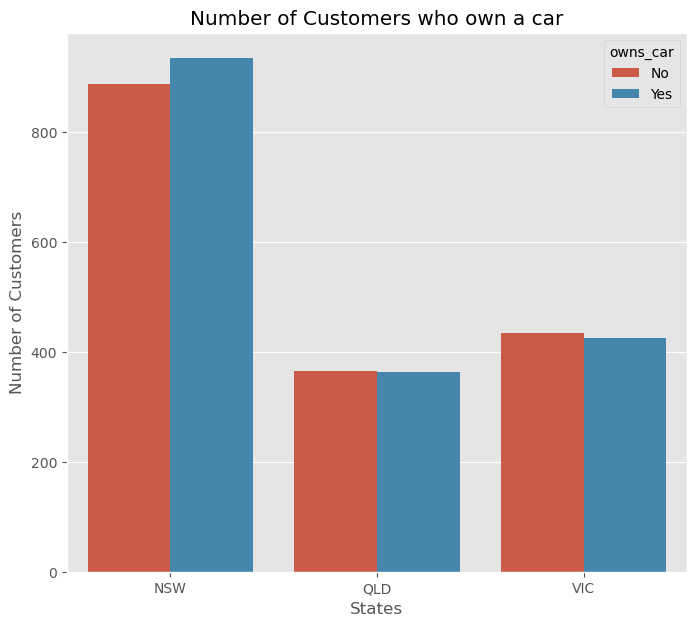

In [48]:
plt.figure(figsize=(8,7))
sns.barplot(x='state', y='Number of Customers' , hue='owns_car', data=state_car_owners)
plt.xlabel('States')
plt.ylabel('Number of Customers')
plt.title('Number of Customers who own a car')
plt.show()

NSW has the largest number of people that donot own a car. It seems that a higher amount of data is collected from NSW compared to other states. In QLD the distribution between customers having a car or not having is even. In Victoria the number is split evenly. Both the numbers are significantly lower than that of NSW

# 4. RFM Analysis Scatter Plots
### 4.1. Recency vs Monetary
The chart shows that customers who purchased recently generated more revenue than customers who visited long time ago. Customers from recent past (50-100) days generated a moderate revenue. Customers who visited 200 days ago generated a low revenue.

<Figure size 800x700 with 0 Axes>

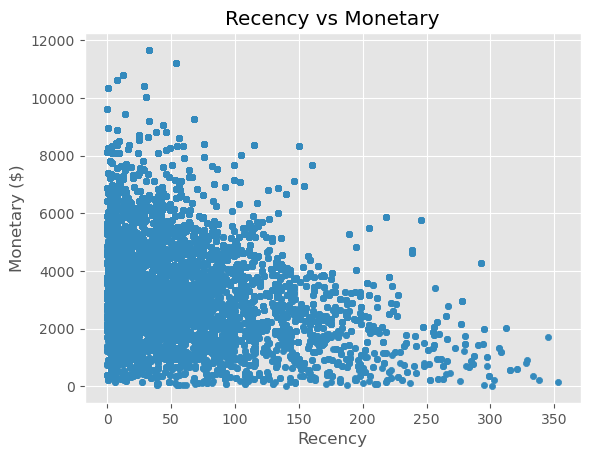

In [49]:
plt.figure(figsize=(8,7))
cust_trans_rfm.plot.scatter(x='recency' , y='monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary ($)')
plt.title('Recency vs Monetary')
plt.show()

### 4.2 Frequency vs Monetary
Customers classified as "Platinum Customers" , "Very Loyal Customers" and "Becoming Loyal Customers" visit frequently, which correlated with increased revenue for the business.

<Figure size 800x700 with 0 Axes>

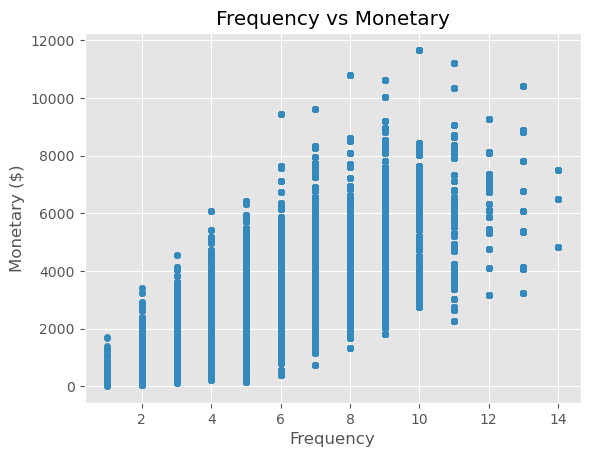

In [50]:
plt.figure(figsize=(8,7))
cust_trans_rfm.plot.scatter(x='frequency' , y='monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary ($)')
plt.title('Frequency vs Monetary')
plt.show()

# 5. Customer Segment Distribution
Finally we can plot the Number of Customers present under a Customer Segment.

In [51]:
cust_per_title = cust_trans_rfm[['detail_cust_title', 'customer_id','rank']].drop_duplicates().groupby(
    ['detail_cust_title','rank']).size().reset_index().sort_values('rank')

In [52]:
cust_per_title.rename(columns={0:'Number of Customers'}, inplace=True)
cust_per_title

,detail_cust_title,rank,Number of Customers
7,Platinum Customer,1,165
10,Very Loyal Customer,2,250
1,Becoming Loyal Customer,3,251
9,Recent Customer,4,365
8,Potential Customer,5,389
4,Late Bloomer,6,297
5,Loosing Customer,7,445
3,High Risk Customer,8,245
0,Almost Lost Customer,9,392
2,Evasive Customer,10,315


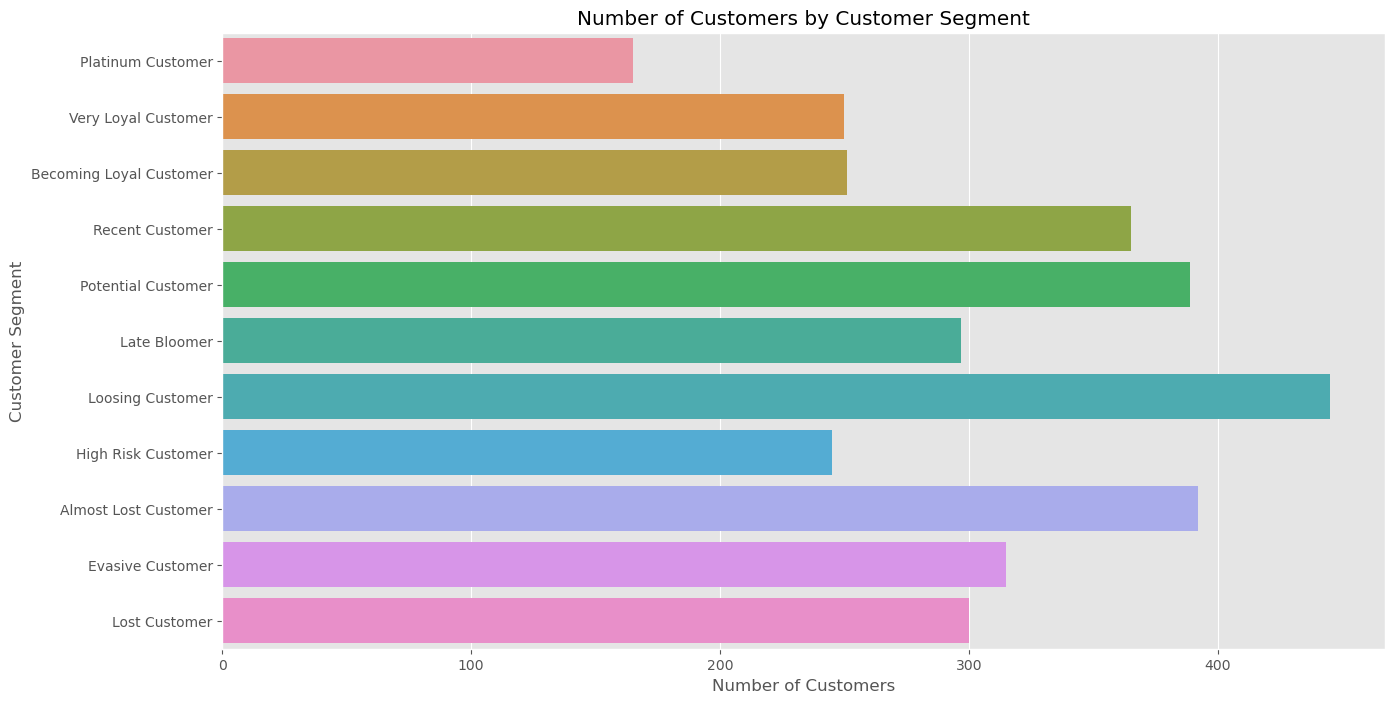

In [53]:
plt.figure(figsize=(15,8))
sns.barplot(y='detail_cust_title' , x='Number of Customers', data=cust_per_title)
plt.xlabel('Number of Customers')
plt.ylabel('Customer Segment')
plt.title('Number of Customers by Customer Segment')
plt.show()